# Identifying and recommending best restaurants

In [4]:
import pandas as pd

In [5]:
#importing excel file
data=pd.read_excel("data.xlsx")

In [6]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873


In [7]:
#finding missing values
data.isna().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#dropping missing values
df=data.dropna()

In [9]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#info about each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating     

In [11]:
#viewing statistical details about the data
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.541000e+03,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000
mean,9.044236e+06,18.181008,64.274135,25.848826,1200.368096,1.804842,2.665088,156.707892
std,8.791953e+06,56.454284,41.199675,11.010633,16129.588655,0.905528,1.516596,430.180201
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019320e+05,1.000000,77.081601,28.478683,250.000000,1.000000,2.500000,5.000000
50%,6.003426e+06,1.000000,77.192035,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835266e+07,1.000000,77.282045,28.642713,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
#finding duplicates in the data
duplicate=df[df.duplicated()]

In [13]:
duplicate

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes


In [14]:
#There are no duplicates in this dataframe


In [15]:
import seaborn as sns

In [16]:
#finding out count of Restaurants
df1=df["Restaurant Name"].value_counts()

In [17]:
df1

Cafe Coffee Day            83
Domino's Pizza             79
Subway                     63
Green Chick Chop           51
McDonald's                 48
                           ..
BBQ Factory                 1
Om Shanti Foods             1
Makansutra Gluttons Bay     1
Chinese Chilli Seasonal     1
Houlihan's                  1
Name: Restaurant Name, Length: 7436, dtype: int64

In [18]:
 #the cities with the maximum number of restaurants
df.City.value_counts().head(5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [19]:
 #the cities with the minimum number of restaurants
df.City.value_counts().tail(5)

Cochrane          1
Winchester Bay    1
Lorn              1
Trentham East     1
Chatham-Kent      1
Name: City, dtype: int64

In [20]:
#merging country names with country code from another excel data
df2=pd.read_excel("Country-Code.xlsx")

In [21]:
def country(code):
    if code==1:
        return "India"
    if code==30:
        return "Brazil"
    if code==37:
        return "Canada"
    if code==14:
        return "Australia"
    if code==94:
        return "Indonesia"
    if code==148:
        return "New Zealand"
    if code==162:
        return "Phillipines"
    if code==166:
        return "Qatar"
    if code==184:
        return "Singapore"
    if code==189:
        return "South Africa"
    if code==191:
        return "Sri Lanka"
    if code==208:
        return "Turkey"
    if code==214:
        return "UAE"
    if code==215:
        return "United Kingdom"
    if code==216:
        return "United States"
    else:
        pass

In [22]:
#adding country names to the data
df["Country"]=df["Country Code"].apply(country)

<ipython-input-22-9657c40b8df1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"]=df["Country Code"].apply(country)


In [23]:

#Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence
dd=df.groupby("Country")["Restaurant Name"].value_counts()

In [24]:
dd

Country        Restaurant Name                      
Australia      1918 Bistro & Grill                      1
               5 Little Pigs                            1
               Anchorage Cafe Restaurant Wine Bar       1
               Beach Box Cafe                           1
               Bespoke Harvest                          1
                                                       ..
United States  Yellow Dog Eats                          1
               Zen Japanese Steakhouse and Sushi Bar    1
               Zoeys Pizzeria                           1
               Zombie Burger + Drink Lab                1
               Zunzi's                                  1
Name: Restaurant Name, Length: 7463, dtype: int64

In [25]:
#countries with maximum no of restaurants
df.Country.value_counts().head(5)

India             8651
United States      425
United Kingdom      80
South Africa        60
UAE                 60
Name: Country, dtype: int64

In [26]:
#No of restaurants having table booking
has_tb=df["Has Table booking"].value_counts()

In [27]:
has_tb

No     8383
Yes    1158
Name: Has Table booking, dtype: int64

In [28]:
#Finding out the ratio between restaurants that allow table booking vs. those that do not allow table booking
ratio=1158/8383

In [29]:
ratio

0.13813670523678873

In [30]:
#Finding out the percentage of restaurants providing online delivery
df["Has Online delivery"].value_counts()

No     7090
Yes    2451
Name: Has Online delivery, dtype: int64

In [31]:
percent_rest=(2451/9541)*100

In [32]:
percent_rest

25.68913111833141

In [33]:
#the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver
df.groupby("Has Online delivery")["Votes"].sum()

Has Online delivery
No     977236
Yes    517914
Name: Votes, dtype: int64

In [34]:
vote_diff=977236-517914

In [35]:
vote_diff

459322

In [36]:
#cuisines served across cities
df.groupby("City")["Cuisines"].value_counts()

City       Cuisines                          
Abu Dhabi  American                              2
           Indian                                2
           Italian, Pizza                        2
           American, Desserts                    1
           American, Mexican, Seafood            1
                                                ..
€¡stanbul  Italian, World Cuisine                1
           Restaurant Cafe, Desserts             1
           Restaurant Cafe, Turkish, Desserts    1
           Turkish                               1
           World Cuisine, Patisserie, Cafe       1
Name: Cuisines, Length: 3023, dtype: int64

In [37]:
#maximum no of cuisines served per city
df.groupby("City")["Cuisines"].max().value_counts().head(10)

Thai                                   8
Seafood                                5
South Indian                           4
South Indian, North Indian, Chinese    4
Southern                               3
Cafe                                   3
Street Food                            3
Steak                                  3
Vietnamese                             2
Tapas                                  2
Name: Cuisines, dtype: int64

In [38]:
#minimum no of cuisines served per city
df.groupby("City")["Cuisines"].min().value_counts().tail(10)

Contemporary, Burger, European                  1
American, Asian, Italian, Seafood               1
Filipino, Mexican                               1
Chinese                                         1
Cafe, Bakery                                    1
Breakfast, Coffee and Tea, Modern Australian    1
Cafe, Mughlai, North Indian                     1
Bakery, Desserts, Fast Food                     1
Andhra                                          1
American, Chinese, North Indian                 1
Name: Cuisines, dtype: int64

In [39]:
#maximum no of cuisines served across restaurants
df.groupby("Restaurant Name")["Cuisines"].max().value_counts().head(10)

North Indian                      818
North Indian, Chinese             438
Chinese                           281
Fast Food                         263
North Indian, Mughlai             254
Bakery                            183
North Indian, Mughlai, Chinese    176
Bakery, Desserts                  154
Street Food                       137
Cafe                              132
Name: Cuisines, dtype: int64

In [40]:
#minimum no of cuisines served across restaurants
df.groupby("Restaurant Name")["Average Cost for two"].sum().head(10)

Restaurant Name
12212                 400
 Let's Burrrp         400
#45                   600
#Dilliwaala6          800
#InstaFreeze          300
#OFF Campus           800
#Urban CafÌ©          650
#hashtag              500
'Ohana                 45
10 Downing Street    2500
Name: Average Cost for two, dtype: int64

<AxesSubplot:xlabel='Currency', ylabel='Average Cost for two'>

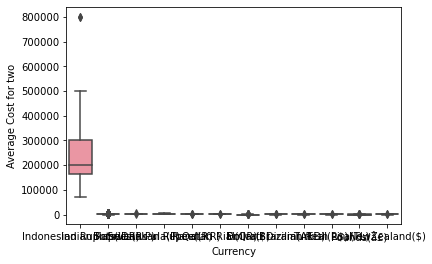

In [59]:
#distribution of cost
sns.boxplot(x=df["Currency"],y=df["Average Cost for two"])


Since in Indonesian currency, Average Cost for two varies between 100000 to 800000, the plot loooks unequal. Other currencies are ranging between 0 and 8000

In [41]:
df["Average Cost for two"].mean()

1200.3680955874647

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

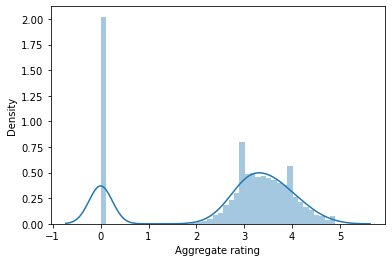

In [42]:
#ratings distributed among various factors
sns.distplot(df["Aggregate rating"])

In [43]:
#findings factors which have effect on ratings by correlation
dc=df.corr()

<AxesSubplot:>

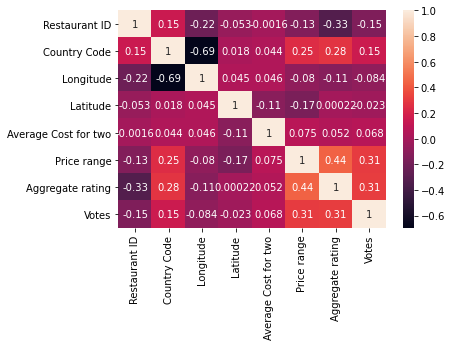

In [44]:
sns.heatmap(dc,annot=True)

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Has Table booking', ylabel='Aggregate rating'>

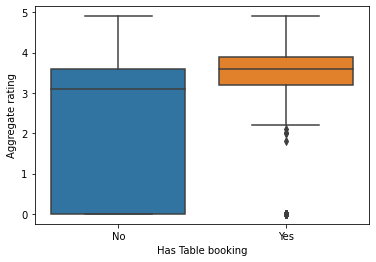

In [45]:
sns.boxplot(df["Has Table booking"],df["Aggregate rating"])

Table booking has some impact on rating

Only Price range has r=0.4, some relation with ratings

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Has Online delivery', ylabel='Aggregate rating'>

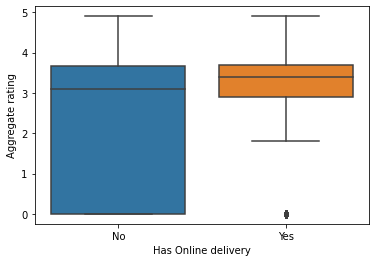

In [46]:
sns.boxplot(df["Has Online delivery"],df["Aggregate rating"])

Online delivery has an impact on rating

In [47]:
da=df["Cuisines"].value_counts()

In [48]:
df["No_of_cuisines"]=df["Cuisines"].str.strip().str.split(',').apply(len)

<ipython-input-48-74cf26065983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No_of_cuisines"]=df["Cuisines"].str.strip().str.split(',').apply(len)


In [49]:
df["No_of_cuisines"]

0       2
1       3
2       2
3       1
4       2
       ..
9546    3
9547    3
9548    6
9549    1
9550    2
Name: No_of_cuisines, Length: 9541, dtype: int64

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_cuisines', ylabel='Aggregate rating'>

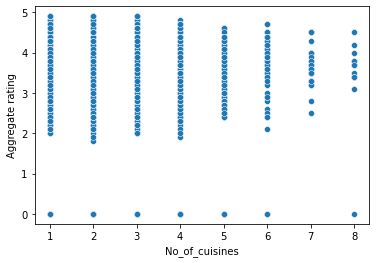

In [50]:
#finding out whether there is any relation between No of cuisines served and rating
sns.scatterplot(df["No_of_cuisines"],df["Aggregate rating"])

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_cuisines', ylabel='Aggregate rating'>

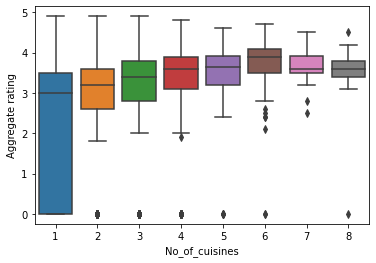

In [61]:
sns.boxplot(df["No_of_cuisines"],df["Aggregate rating"])

So when no of cuisines are high, rating also high

In [51]:
#Exporting merged data file to tableau for visualization 
df.to_excel("df.xlsx")